# Setup

In [1]:
import pandas as pd
pd.set_option("display.max_colwidth", None)

from src.utils import text_cleaning as tc # custom text cleaning script

C:\Users\Utopia\AppData\Local\Temp\ipykernel_5692\2151023884.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Utopia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Utopia\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Utopia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load data
We use the "cyberbullying_tweets_v2.csv" dataset created by under-sampling the <a href="https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification">Cyberbullying Classification</a> dataset from Kaggle

## Content

* **tweet_text** - Text of the tweet
* **cyberbullying_type** - Type of cyberbullying harassment.


In [3]:
tweets_df = pd.read_csv("../data/cyberbullying_tweets_v2.csv")
tweets_df

,tweet_text,cyberbullying_type
0,"Where. Is. The. Logic? ""@kenny_Gurl: @BrendanRochford @YesYoureRacist all niggers smell like shit and have dumb nigger names fuck niggers""",ethnicity
1,"Females is always used as a replacement for bitch, whenever you see niggas or even women using females its in a negative connotation so lately I’ll tell niggas if they wanna call me a bitch they should just say that",gender
2,"@slagkick frost for now. still learning how to play. for bgs, seems to work well.",not_cyberbullying
3,Which will end first: #mkr or Tony Abbott as PM?,not_cyberbullying
4,@JWYoder ouch.,other_cyberbullying
...,...,...
15932,At least you understand that woman != conventionally feminine @smalltownAbbey I would love to see all women embrace femininity. #notsexist,not_cyberbullying
15933,"@Tidal_Salty you have a lot of balls liking this. You are my nigger and tygers dumb ass white friend, you are the only person to come close to the level of crust that man has. Fuck you.",ethnicity
15934,"Lets get one thing straight, free thinking means saying shit like obama did a horrible job and not identifying with the identity politics and the reality tv shows that make black and colored folks look bad. Pretending racism doesnt exist especially in America makes u a coward",ethnicity
15935,@AbuSaalihah1 @rConflictNews Hope we can get the two not working for the BBC back.,not_cyberbullying


In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15937 entries, 0 to 15936
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          15937 non-null  object
 1   cyberbullying_type  15937 non-null  object
dtypes: object(2)
memory usage: 249.1+ KB


In [5]:
tweets_df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

<Axes: >

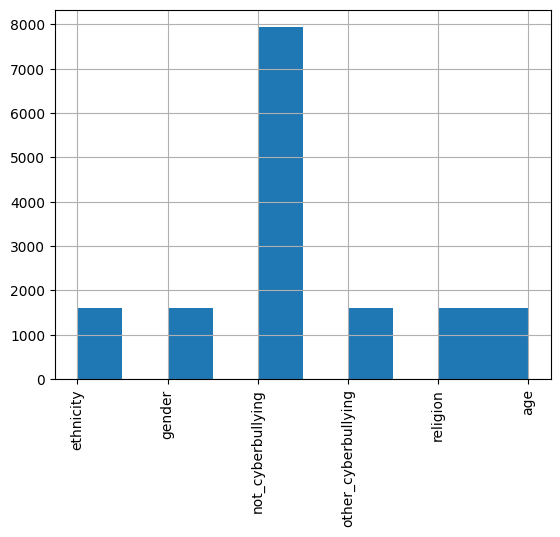

In [6]:
tweets_df["cyberbullying_type"].hist(xrot=90)

# Data cleaning

In [7]:
# Is it cyberbullying?
tweets_df["is_cyberbullying"] = [0 if x=="not_cyberbullying" else 1 for x in tweets_df["cyberbullying_type"]]

In [9]:
# Clean tweet text
tweets_df["cleaned_text"] = tweets_df["tweet_text"].apply(tc.clean_text)

In [10]:
tweets_df[['tweet_text', 'cleaned_text']]

,tweet_text,cleaned_text
0,"Where. Is. The. Logic? ""@kenny_Gurl: @BrendanRochford @YesYoureRacist all niggers smell like shit and have dumb nigger names fuck niggers""",logic nigger smell like shit dumb nigger name fuck nigger
1,"Females is always used as a replacement for bitch, whenever you see niggas or even women using females its in a negative connotation so lately I’ll tell niggas if they wanna call me a bitch they should just say that",female always used replacement bitch whenever see nigga even woman using female negative connotation lately tell nigga wanna call bitch say
2,"@slagkick frost for now. still learning how to play. for bgs, seems to work well.",frost still learning play bgs seems work well
3,Which will end first: #mkr or Tony Abbott as PM?,end first #mkr tony abbott pm
4,@JWYoder ouch.,ouch
...,...,...
15932,At least you understand that woman != conventionally feminine @smalltownAbbey I would love to see all women embrace femininity. #notsexist,least understand woman conventionally feminine would love see woman embrace femininity #notsexist
15933,"@Tidal_Salty you have a lot of balls liking this. You are my nigger and tygers dumb ass white friend, you are the only person to come close to the level of crust that man has. Fuck you.",lot ball liking nigger tygers dumb as white friend person come close level crust man fuck
15934,"Lets get one thing straight, free thinking means saying shit like obama did a horrible job and not identifying with the identity politics and the reality tv shows that make black and colored folks look bad. Pretending racism doesnt exist especially in America makes u a coward",let get one thing straight free thinking mean saying shit like obama horrible job identifying identity politics reality tv show make black colored folk look bad pretending racism doesnt exist especially america make u coward
15935,@AbuSaalihah1 @rConflictNews Hope we can get the two not working for the BBC back.,hope get two working bbc back


In [13]:
# Save cleaned dataset
cleaned_df = tweets_df[['cleaned_text', 'is_cyberbullying']]
cleaned_df.to_csv("../data/cleaned_tweets.csv", index=False)